In [1]:
library(tidyverse)
library(ape)
library(aplot)
library(ggtree)
library(cowplot)
library(data.table)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘ape’


The following object is masked from ‘package:dplyr’:

    where


aplot v0.2.8 For help: https://github.com/YuLab-SMU/aplot/issues

If you use aplot in published research, please cite the paper:

Shuangbin Xu, Qianwen Wang, Shaodi Wen, Junrui Li, Nan He, Ming Li,
Thomas Hackl, Rui Wang, Dongqiang Zeng, Shixiang

In [2]:
path_to_input_file <- 'cactus_aligmnent.tsv'

In [7]:
path_to_guide_tree <- 'phylogeny_49_species.nwk'

In [4]:
cov_stat_df <- fread(path_to_input_file)

In [5]:
cov_stat_df

query,chrom,len,aln,identity,H.sapiens coverage,H.sapiens identity,H.sapiens divergence
<chr>,<chr>,<int64>,<int64>,<int64>,<dbl>,<dbl>,<dbl>
Allenopithecus_nigroviridis,autosomes,2900555906,2214765962,2072888995,0.764,0.936,0.064
Allenopithecus_nigroviridis,chrX,154259566,116091512,109453208,0.753,0.943,0.057
Aotus_nancymaae,autosomes,2900555906,2071806237,1866806447,0.714,0.901,0.099
Aotus_nancymaae,chrX,154259566,103806155,94206179,0.673,0.908,0.092
Ateles_hybridus,autosomes,2900555906,2079522617,1875042239,0.717,0.902,0.098
Ateles_hybridus,chrX,154259566,105434853,95815387,0.683,0.909,0.091
Callimico_goeldii,autosomes,2900555906,1899584370,1698387242,0.655,0.894,0.106
Callimico_goeldii,chrX,154259566,95436891,86018469,0.619,0.901,0.099
Callithrix_jacchus,autosomes,2900555906,2033679945,1816079108,0.701,0.893,0.107


In [9]:
guide_tree <- read.tree(path_to_guide_tree)

In [10]:
guide_tree_clado <- compute.brlen(guide_tree, method = "cladogram")

In [11]:
tree <- ggtree(guide_tree_clado) +
    geom_tiplab(size=4, align=TRUE, linesize=.5) + 
    xlim_tree(6)+
    theme_tree2() +
    theme(axis.text.x=element_blank(),
          axis.ticks.x=element_blank(),
          axis.line=element_blank(),
         legend.position="none")

tree <- flip(tree, 55, 70) %>% flip(23, 77)

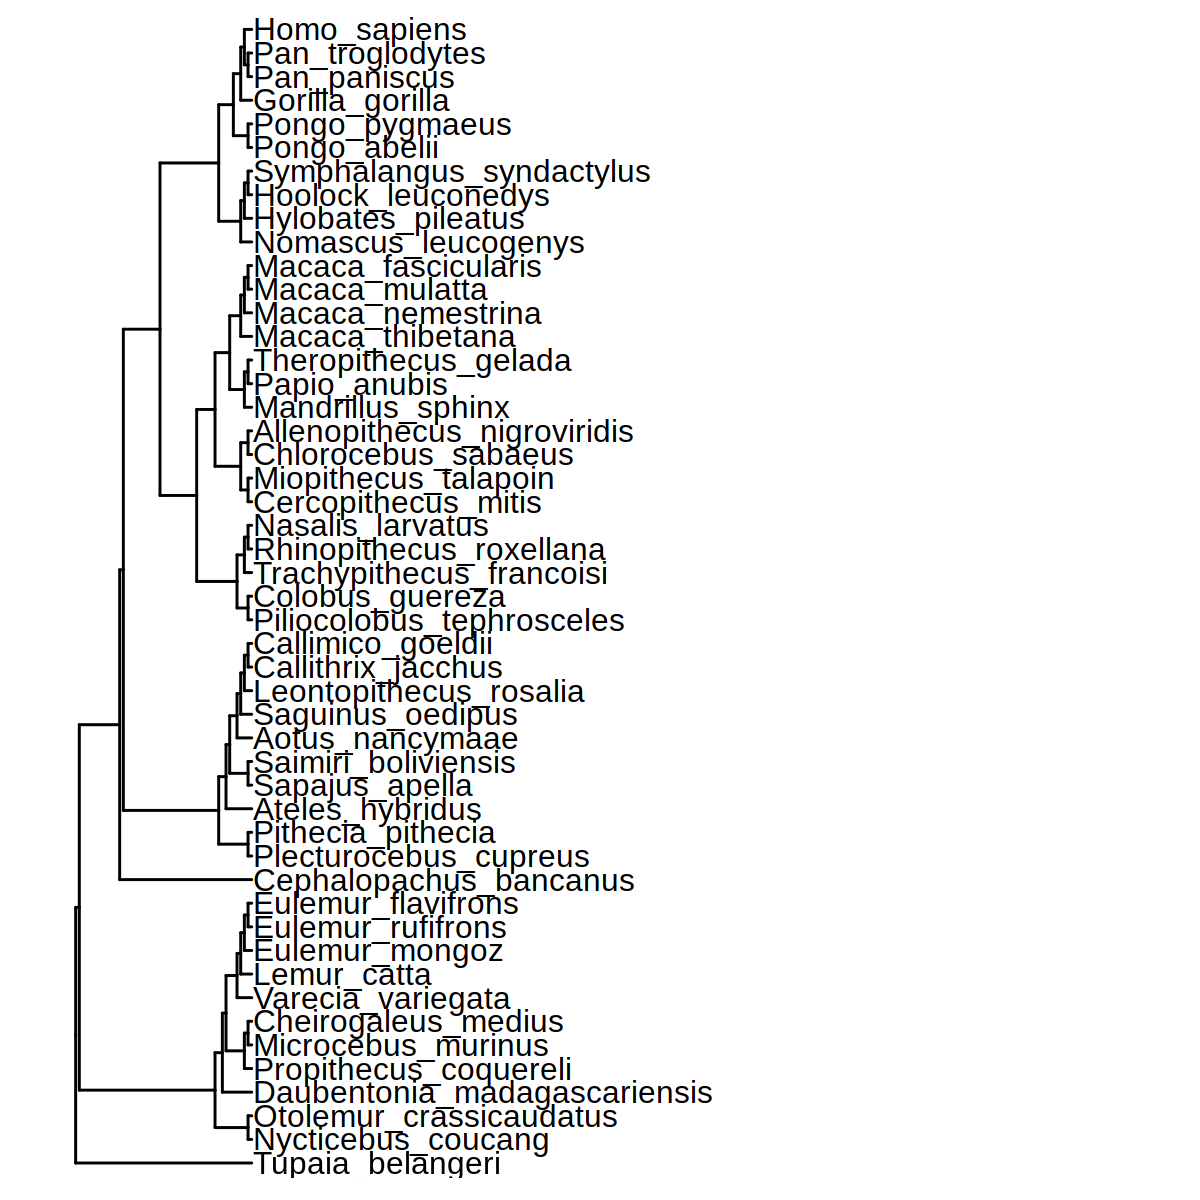

In [19]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 200)
tree

In [13]:
p_coverage <- ggplot(cov_stat_df, aes(query, `H.sapiens coverage`, fill = chrom)) + 
    geom_hline(yintercept = seq(0.25, 1, 0.25), linetype = 'dotted', color = 'grey')+
    geom_col(position=position_dodge2(reverse = TRUE)) +  
    scale_fill_manual(values = c('#1e81b0', 'darkorange')) +
    coord_flip() + 
    theme_tree2() +
    ggtitle('H.sapiens coverage') + 
    theme(legend.title=element_blank(),
         legend.text = element_text(size=12),
         legend.position="none")

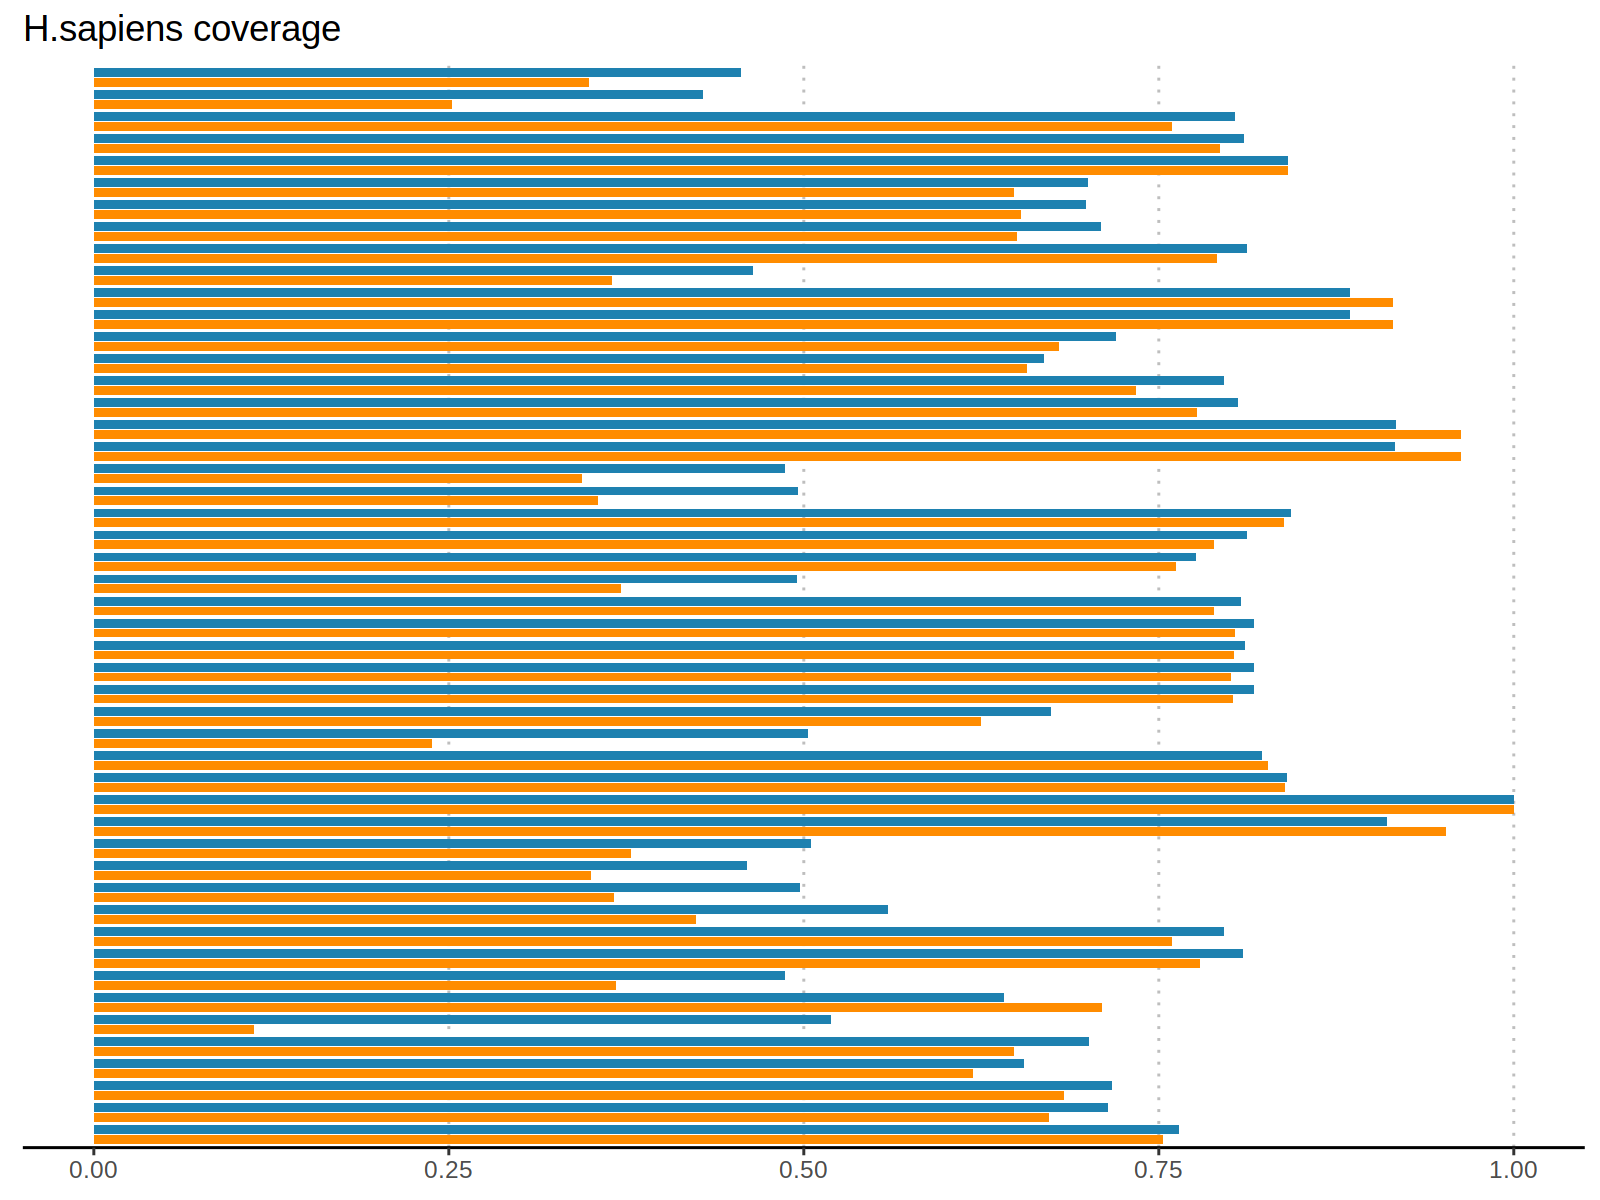

In [16]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
p_coverage

In [17]:
p_divergence <- ggplot(cov_stat_df, aes(query, `H.sapiens divergence`, fill = chrom)) + 
    geom_hline(yintercept = seq(0.05, 0.25, 0.05), linetype = 'dotted', color = 'grey')+
    geom_col(position=position_dodge2(reverse = TRUE)) +  
    scale_fill_manual(values = c('#1e81b0', 'darkorange')) +
    coord_flip() + 
    theme_tree2() +
    ggtitle('H.sapiens divergence') + 
    theme(legend.title=element_blank(),
         legend.text = element_text(size=12))

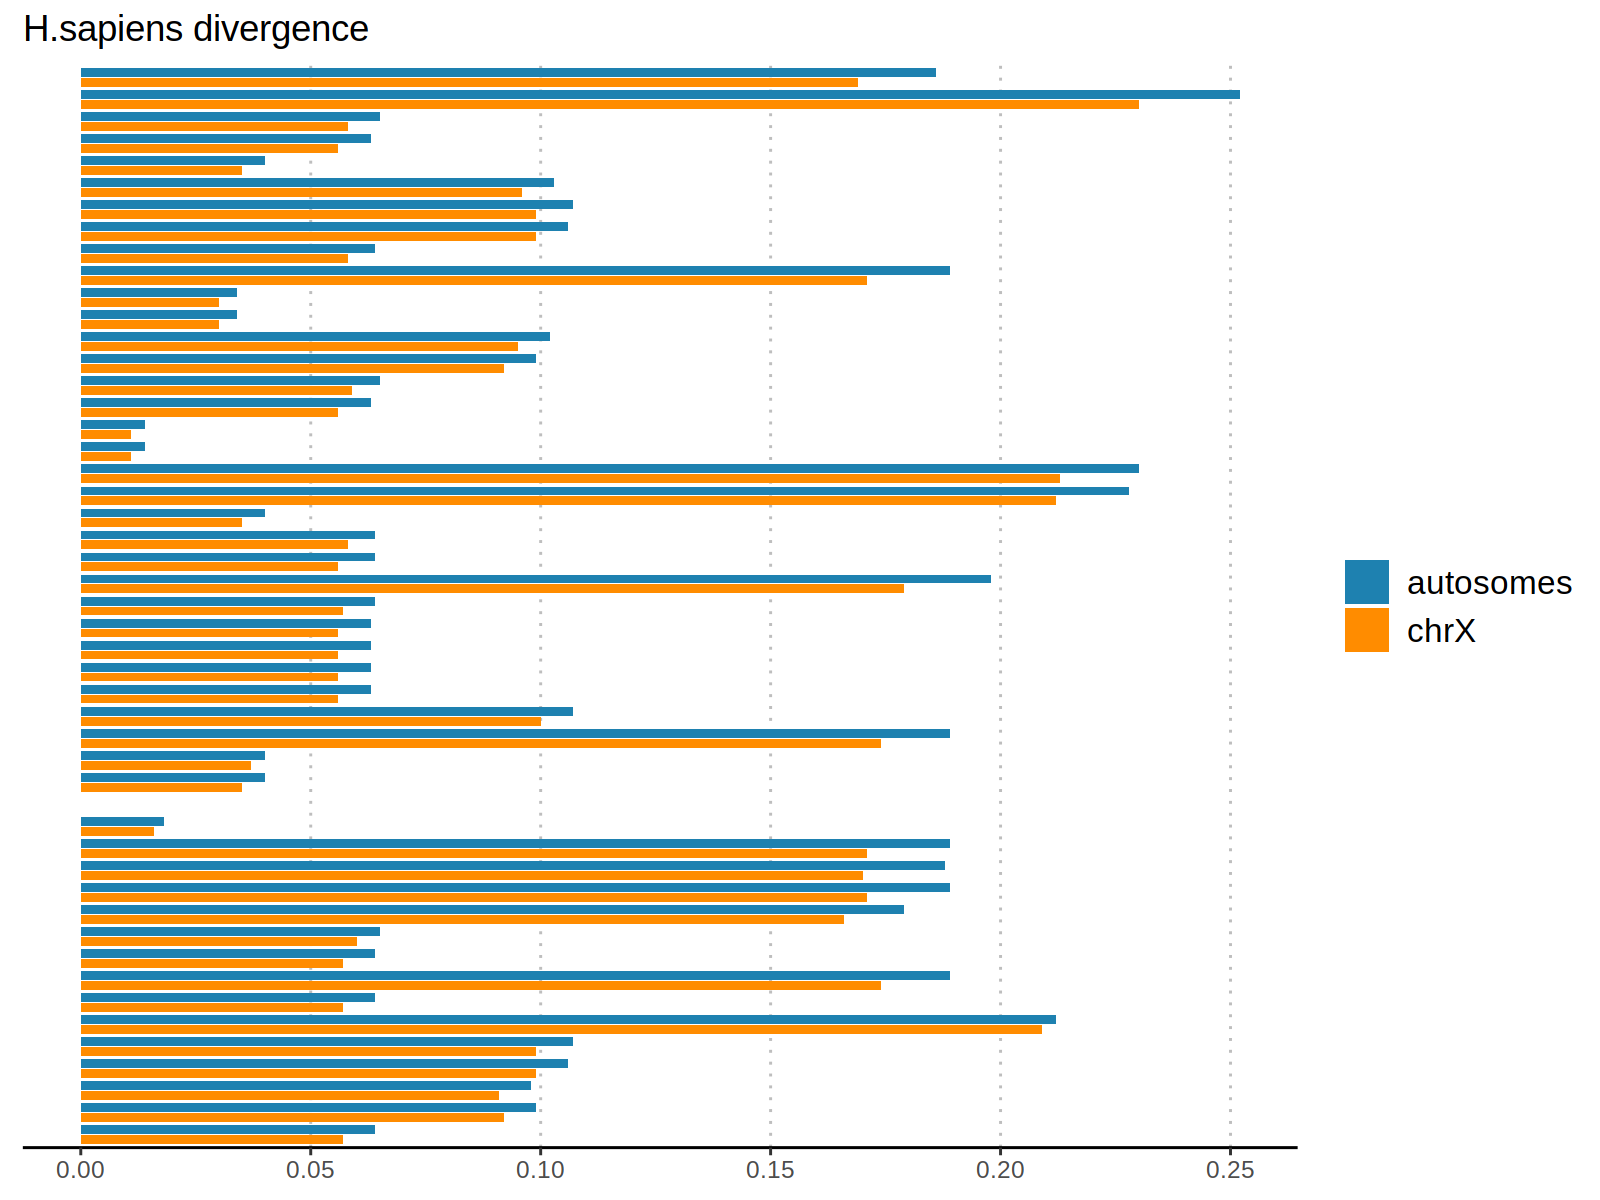

In [18]:
options(repr.plot.width = 8, repr.plot.height = 6, repr.plot.res = 200)
p_divergence